<a href="https://colab.research.google.com/github/allison-EJ/Simple-Calculator/blob/main/User_Feedback_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pandas numpy matplotlib seaborn google-play-scraper spacy bertopic nltk

In [2]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 66.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [3]:
"""
Step 1 - Imports and Setup

This cell imports all necessary libraries and performs initial NLTK downloads.
"""

# Import necessary libraries
import pandas as pd
# from google_play_scraper import Sort, reviews_all # Uncomment if you need to scrape again
import spacy
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from bertopic import BERTopic
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
nlp = spacy.load("en_core_web_sm")

In [5]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [6]:
from google_play_scraper import Sort, reviews_all
import pandas as pd
import json

app_id = 'com.booking' # Booking.com app ID on Google Play
print(f"Starting to scrape reviews for {app_id}...")
result = reviews_all(
    app_id,
    lang='en', # defaults to 'en'
    country='us', # defaults to 'us'
    sort=Sort.NEWEST, # Sort by newest to get recent feedback

)

# Convert the list of review dictionaries to a pandas DataFrame
df_reviews = pd.DataFrame(result)

# Save the DataFrame to a CSV file
csv_filename = 'booking_com_reviews_raw.csv'
df_reviews.to_csv(csv_filename, index=False)

print(f"Scraping completed {len(df_reviews)} reviews saved to {csv_filename}")

Starting to scrape reviews for com.booking...
Scraping completed 352452 reviews saved to booking_com_reviews_raw.csv


In [16]:
from google.colab import files
files.download('booking_com_reviews_raw.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [8]:
# This cell reads the CSV file into a pandas DataFrame
df = pd.read_csv('booking_com_reviews_raw.csv')
print("DataFrame loaded successfully.")

DataFrame loaded successfully.


In [9]:
"""
Exploratory Data Analysis (EDA) Snippets

The next lines of code performs basic inspection and visualizes key distributions
of the cleaned DataFrame.
"""

print("\nDataFrame Info:")
df.info() # Check data types, non-null counts


DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352452 entries, 0 to 352451
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   reviewId              352452 non-null  object
 1   userName              352452 non-null  object
 2   userImage             352452 non-null  object
 3   content               352032 non-null  object
 4   score                 352452 non-null  int64 
 5   thumbsUpCount         352452 non-null  int64 
 6   reviewCreatedVersion  311490 non-null  object
 7   at                    352452 non-null  object
 8   replyContent          70279 non-null   object
 9   repliedAt             70279 non-null   object
 10  appVersion            311490 non-null  object
dtypes: int64(2), object(9)
memory usage: 29.6+ MB


In [10]:
print("\nFirst 5 Rows:")
print(df.head()) # To see what our data looks like


First 5 Rows:
                               reviewId       userName  \
0  57e1e4d5-a2d2-4046-ba22-bd61f0b67b9b  A Google user   
1  9f9a870c-5e30-4092-9689-9c3e08b78995  A Google user   
2  ee21871a-4093-4867-b26b-9d726526f0b3  A Google user   
3  e8854de2-fb59-4b6a-a9a0-c664d4b45f3e  A Google user   
4  af2fe8dd-fb9f-4f26-b521-110aabe38e41  A Google user   

                                           userImage  \
0  https://play-lh.googleusercontent.com/EGemoI2N...   
1  https://play-lh.googleusercontent.com/EGemoI2N...   
2  https://play-lh.googleusercontent.com/EGemoI2N...   
3  https://play-lh.googleusercontent.com/EGemoI2N...   
4  https://play-lh.googleusercontent.com/EGemoI2N...   

                                             content  score  thumbsUpCount  \
0  I think you need to make it where you can pay ...      4              0   
1                                                 ok      5              0   
2                               Oh, so easy to use .      5      

In [11]:
print("\nDescriptive Statistics (for numerical columns):")
print(df.describe()) # Good for ratings, etc.


Descriptive Statistics (for numerical columns):
               score  thumbsUpCount
count  352452.000000  352452.000000
mean        4.543319       1.074464
std         1.049230      15.573579
min         0.000000       0.000000
25%         5.000000       0.000000
50%         5.000000       0.000000
75%         5.000000       0.000000
max         5.000000    1684.000000


In [12]:
print("\nMissing Values Count:")
print(df.isnull().sum()) # Identify columns with missing data


Missing Values Count:
reviewId                     0
userName                     0
userImage                    0
content                    420
score                        0
thumbsUpCount                0
reviewCreatedVersion     40962
at                           0
replyContent            282173
repliedAt               282173
appVersion               40962
dtype: int64


In [13]:
print("\nUnique Users Count:")
print(df['userName'].nunique()) # See how many unique users


Unique Users Count:
1


In [14]:
if 'review_length' not in df.columns:
    df['review_length'] = df['content'].apply(lambda x: len(str(x).split()))

print("\n--- Review Length Distribution ---")
print("Review Length Descriptive Statistics:")
print(df['review_length'].describe())


--- Review Length Distribution ---
Review Length Descriptive Statistics:
count    352452.000000
mean          8.883241
std          12.952073
min           1.000000
25%           2.000000
50%           5.000000
75%          10.000000
max         306.000000
Name: review_length, dtype: float64


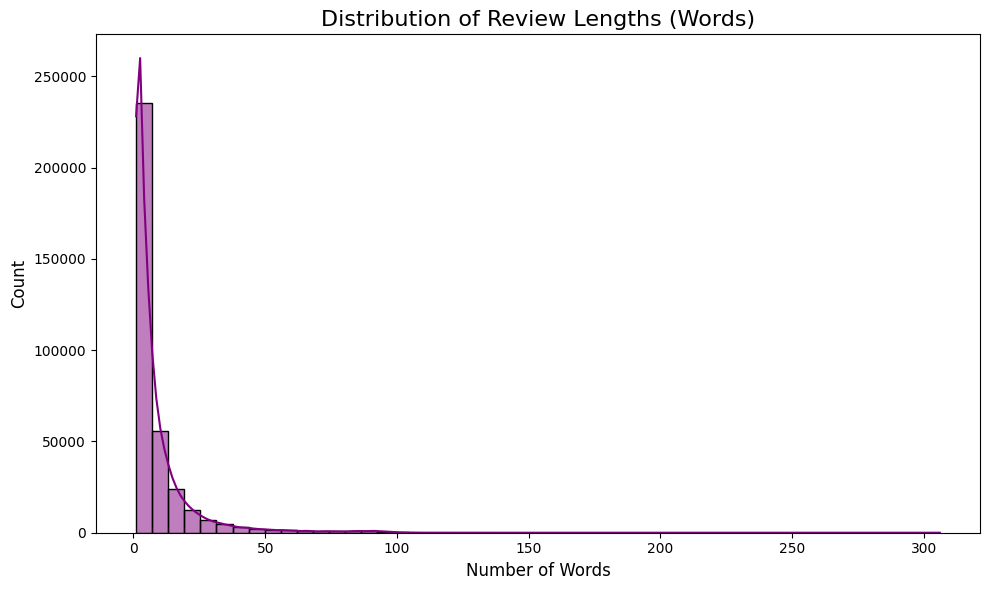


 Review length distribution plot saved as review_length_distribution.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [17]:
# Create and display the plot
plt.figure(figsize=(10, 6))
sns.histplot(df['review_length'], bins=50, kde=True, color='purple')
plt.title('Distribution of Review Lengths (Words)', fontsize=16)
plt.xlabel('Number of Words', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()

# Save the image as a high resolution
plt.savefig('review_length_distribution.png', dpi=300)
plt.show()

# Confirm it's saved
print("\n Review length distribution plot saved as review_length_distribution.png")

# Download the saved PNG file
from google.colab import files
files.download('review_length_distribution.png')



--- Star Rating Distribution ---
Star Rating Distribution (Percentage):
score
0     0.000284
1     6.282558
2     0.989355
3     1.971616
4    13.625118
5    77.131070
Name: proportion, dtype: float64


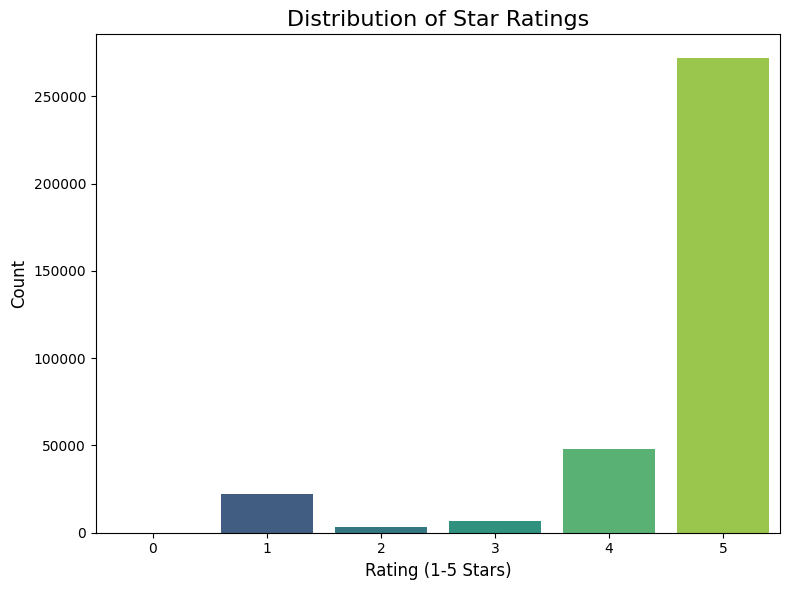

Star rating distribution plot saved as star_rating_distribution.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


--- EDA Complete ---


In [18]:
# Print star rating distribution as percentages
print("\n--- Star Rating Distribution ---")
print("Star Rating Distribution (Percentage):")
print(df['score'].value_counts(normalize=True).sort_index() * 100)

# Plot the star rating count distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='score', data=df, palette='viridis')
plt.title('Distribution of Star Ratings', fontsize=16)
plt.xlabel('Rating (1-5 Stars)', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()

# Save the plot to file
plt.savefig('star_rating_distribution.png', dpi=300)
plt.show()
print("Star rating distribution plot saved as star_rating_distribution.png")

# Download the saved PNG file
from google.colab import files
files.download('star_rating_distribution.png')

# Finish EDA message
print("\n--- EDA Complete ---")


In [19]:
"""
Step 3 - Initial Data Cleaning (Pandas)

This cell performs initial cleaning steps using Pandas:
- Handling missing values
- Removing duplicates
- Lowercasing text
- Creating a review_length column

This will give the precise count of unique, processed reviews.
"""

print("\n--- Starting Initial Data Cleaning (Pandas) ---")

# Handle missing values in 'content' column
initial_rows_before_null_drop = len(df)
df.dropna(subset=['content'], inplace=True)
print(f"Removed {initial_rows_before_null_drop - len(df)} rows with missing content. Remaining: {len(df)}")

# Remove duplicates based on content and userName
# This is crucial to prevent bias from repeated reviews
initial_rows_before_duplicate_drop = len(df)
df.drop_duplicates(subset=['content', 'userName'], inplace=True)
print(f"Removed {initial_rows_before_duplicate_drop - len(df)} duplicate rows. Remaining: {len(df)}")

# Lowercasing the content for standardization
df['content_lower'] = df['content'].str.lower()

# Create a review_length column
df['review_length'] = df['content'].apply(lambda x: len(str(x).split()))

# Report and save
final_unique_reviews_count = len(df)
print(f"Dataset size after initial cleaning (unique, non-null reviews): {final_unique_reviews_count} reviews.")

# Save to CSV
filename = 'booking_com_reviews_initial_cleaned.csv'
df.to_csv(filename, index=False)
print(f"Initial cleaned data saved as {filename}")

# Download the file to local machine
from google.colab import files
files.download(filename)


--- Starting Initial Data Cleaning (Pandas) ---
Removed 420 rows with missing content. Remaining: 352032
Removed 126617 duplicate rows. Remaining: 225415
Dataset size after initial cleaning (unique, non-null reviews): 225415 reviews.
Initial cleaned data saved as booking_com_reviews_initial_cleaned.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [20]:
"""
Step 4 - SpaCy Model Setup and Preprocessing Function

This cell loads the spaCy English model and defines the custom preprocessing function.
"""

print("\n--- Setting up Advanced spaCy Pre-processing ---")

# Custom function for spaCy pre-processing
# This function defines the tokenization, lemmatization, stopword removal,
# punctuation removal, and alphabetic filtering logic.
def preprocess_text_spacy(text):
    if not isinstance(text, str):
        return "" # Ensure input is string to avoid errors
    doc = nlp(text)
    # Process each token: lemmatize, lowercase, remove stopwords, punctuation, and non-alphabetic
    tokens = [
        token.lemma_.lower() for token in doc
        if not token.is_stop and not token.is_punct and token.is_alpha
    ]
    return " ".join(tokens)

print("SpaCy model loaded and preprocessing function defined.")



--- Setting up Advanced spaCy Pre-processing ---
SpaCy model loaded and preprocessing function defined.


In [21]:
"""
Step 5 - Apply Advanced Cleaning (SpaCy nlp.pipe)

This is the computationally intensive step where spaCy processes all reviews.
It uses nlp.pipe for efficiency and parallel processing.
"""

print("Applying advanced spaCy pre-processing (this may take a while, over 2-3 hours for the 350+ reviews we have).")

# Convert content column to a list of strings for nlp.pipe
texts_to_process = df['content'].astype(str).tolist()

# Use nlp.pipe for efficient parallel processing
# batch_size: processes reviews in batches
# n_process=-1: uses all available CPU cores for parallelization
cleaned_reviews_list = []
for doc in nlp.pipe(texts_to_process, batch_size=100, n_process=-1):
    # Apply the same token filtering logic as in preprocess_text_spacy
    tokens = [token.lemma_.lower() for token in doc if not token.is_stop and not token.is_punct and token.is_alpha]
    cleaned_reviews_list.append(" ".join(tokens))

# Add the cleaned reviews back to the DataFrame
df['cleaned_review'] = cleaned_reviews_list
print("Advanced spaCy pre-processing complete.")

# Save the DataFrame with cleaned reviews
df.to_csv('booking_com_reviews_advanced.csv', index=False)
print("Advanced cleaned data saved to booking_com_reviews_advanced.csv")

# Download
from google.colab import files
files.download('booking_com_reviews_advanced.csv')

Applying advanced spaCy pre-processing (this may take a while, over 2-3 hours for the 350+ reviews we have).
Advanced spaCy pre-processing complete.
Advanced cleaned data saved to booking_com_reviews_advanced.csv


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
"""
Step 6 - Topic Modeling with BERTopic

This cell initializes and trains the BERTopic model on your cleaned review data.
"""

print("\n--- Starting Topic Modeling with BERTopic ---")

# Initialize BERTopic model
# verbose=True shows progress updates during training
# nr_topics='auto' allows BERTopic to automatically reduce topics for better interpretability.

model = BERTopic(verbose=True, nr_topics= 50)

# Fit and transform the cleaned reviews to identify topics
print("Fitting BERTopic model (This could also take some time)")
topics, probabilities = model.fit_transform(df['cleaned_review'].tolist())

# Assign the identified topic IDs and probabilities back to the DataFrame
df['topic_id'] = topics
df['topic_probability'] = probabilities
print("BERTopic modeling complete. Topics assigned to reviews.")

# Get basic topic frequency information
topic_freq = model.get_topic_info()
print("\nTop 10 BERTopic Frequencies (before custom naming):")
print(topic_freq.head(11)) # Shows top 10 topics + topic -1 if it's among them

# Save model
try:
    model.save("my_bertopic_model", serialization="safetensors")
    print("BERTopic model saved as my_bertopic_model.")
except Exception as e:
    print(f"Could not save BERTopic model: {e}")

# Save to CSV
df.to_csv('booking_com_reviews_with_topics.csv', index=False)
print("Data with assigned topics saved to booking_com_reviews_with_topics.csv")

# Download CSV
from google.colab import files
files.download('booking_com_reviews_with_topics.csv')


--- Starting Topic Modeling with BERTopic ---
Fitting BERTopic model (This could also take some time)


2025-07-20 22:43:37,263 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/7045 [00:00<?, ?it/s]

2025-07-20 23:20:11,770 - BERTopic - Embedding - Completed ✓
2025-07-20 23:20:11,774 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2025-07-20 23:53:22,722 - BERTopic - Dimensionality - Completed ✓
2025-07-20 23:53:22,730 - BERTopic - Cluster - Start clustering the reduced embeddings
2025-07-20 23:54:11,653 - BERTopic - Cluster - Completed ✓
2025-07-20 23:54:11,655 - BERTopic - Representation - Extracting topics using c-TF-IDF for topic reduction.
2025-07-20 23:54:17,386 - BERTopic - Representation - Completed ✓
2025-07-20 23:54:17,390 - BERTopic - Topic reduction - Reducing number of topics
2025-07-20 23:54:19,036 - BERTopic - Representation - Fine-tuning topics using representation models.
2025-07-20 23:54:21,349 - BERTopic - Representation - Completed ✓
2025-07-20 23:54:21,382 - BERTopic - Topic reduction - Reduced number of topics from 3594 to 50


BERTopic modeling complete. Topics assigned to reviews.

Top 10 BERTopic Frequencies (before custom naming):
    Topic  Count                                 Name  \
0      -1  73012            -1_hotel_booking_app_book   
1       0  48559            0_book_booking_hotel_easy   
2       1  33524                 1_app_great_use_good   
3       2  25600              2_easy_use_fast_helpful   
4       3  11360             3_good_thank_far_awesome   
5       4   7119              4_deal_price_good_great   
6       5   4331  5_service_experience_customer_staff   
7       6   3338                 6_world_ez_word_eazy   
8       7   2486                     7_de_la_que_para   
9       8   2272            8_love_easy_honeymoon_use   
10      9   1623              9_turkey_ali_khan_dubai   

                                       Representation  \
0   [hotel, booking, app, book, room, time, servic...   
1   [book, booking, hotel, easy, accommodation, ca...   
2   [app, great, use, good, love, u

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
# Get available topics from the model
valid_topic_ids = [topic_id for topic_id in model.get_topics().keys() if topic_id != -1]

# Loop through each valid topic and print top keywords
for topic_id in sorted(valid_topic_ids):
    print(f"\n--- Topic {topic_id} ---")
    topic = model.get_topic(topic_id)
    if topic:  # Only if topic has data
        for word, weight in topic:
            print(f"{word} ({weight:.4f})")
    else:
        print("No data available for this topic.")



--- Topic 0 ---
book (0.0282)
booking (0.0277)
hotel (0.0232)
easy (0.0178)
accommodation (0.0174)
cancel (0.0155)
room (0.0152)
find (0.0151)
good (0.0150)
reservation (0.0146)

--- Topic 1 ---
app (0.0546)
great (0.0283)
use (0.0259)
good (0.0228)
love (0.0227)
useful (0.0225)
easy (0.0222)
navigate (0.0213)
application (0.0182)
helpful (0.0169)

--- Topic 2 ---
easy (0.0607)
use (0.0509)
fast (0.0449)
helpful (0.0446)
quick (0.0399)
simple (0.0370)
convenient (0.0354)
useful (0.0348)
friendly (0.0339)
user (0.0298)

--- Topic 3 ---
good (0.0788)
thank (0.0579)
far (0.0500)
awesome (0.0466)
excellent (0.0450)
ok (0.0420)
nice (0.0419)
perfect (0.0401)
great (0.0357)
help (0.0357)

--- Topic 4 ---
deal (0.0925)
price (0.0797)
good (0.0414)
great (0.0391)
rate (0.0361)
use (0.0347)
easy (0.0336)
cheap (0.0329)
offer (0.0259)
discount (0.0259)

--- Topic 5 ---
service (0.1640)
experience (0.0987)
customer (0.0743)
staff (0.0409)
excellent (0.0399)
professional (0.0393)
support (0.0361)

In [27]:
"""
Step 7 - Manual Topic Interpretation and Naming

This is a CRITICAL MANUAL STEP.
We inspected the keywords for each topic ID (using model.get_topic(X))
and assigned a human-readable name.
The 'topic_name_mapping' dictionary below based on our analysis was updated.
"""

print("\n--- Manual Topic Interpretation and Naming ---")


# Based on our qualitative analysis of keywords for each topic ID,

topic_name_mapping = {

    0: "Booking & Reservations",
    1: "General App Praise",
    2: "Ease of Use",
    3: "Positive Experience & Feedback",
    4: "Deals, Prices & Discounts",
    5: "Customer Service & Staff",
    6: "Misspelled Praise / Slang Variants",
    7: "Non-English Feedback (Spanish, Malay etc.)",
    8: "Love for App / Honeymoon Contexts",
    9: "Geo-Specific Reviews (Middle East & Asia)",
    10: "Filtering/Search Options",
    11: "App Works as Expected",
    12: "Technical Issues / Bugs",
    13: "Timing & Check-in Problems",
    14: "Property Owner Communication",
    15: "Touch Interface Metaphors",
    16: "Login / Account Issues",
    17: "Currency & Language Preferences",
    18: "Date / Birthdate Problems",
    19: "Slang for 'Good' / Typo Praise",
    20: "Comfort & Flexibility",
    21: "Expectations vs. Reality",
    22: "Brand Affinity & Loyalty",
    23: "Connection / Loading Issues",
    24: "Spelling Variants of 'Excellent'",
    25: "Star Ratings / Rating System",
    26: "Uninstall / Bloatware Complaints",
    27: "App Updates & Info Refresh",
    28: "Advertisements & Popups",
    29: "Political Statements",
    30: "Dark Mode / UI Themes",
    31: "Random Noise / Spam Characters",
    32: "Catchphrases / App Function Praise",
    33: "Non-English Praise ('Terbaik', etc.)",
    34: "Fraud / Theft Complaints",
    35: "App Simplicity (Lemon Squeezy Theme)",
    36: "Data Accuracy / Satisfaction",
    37: "App as Community / Social Gathering",
    38: "Price Comparison (Agoda, etc.)",
    39: "Misspelled Variants of 'Brilliant'",
    40: "Regional Praise (New York / East)",
    41: "Speed & Efficiency Praise",
    42: "Hangs / Freezes / Crashes",
    43: "Permissions & Privacy Concerns",
    44: "Coverage Area",
    45: "Invoices & Business Use",
    46: "Freezing / Temperature Terms (Likely Noise)",
    47: "Child/Guest Options & Search Filters",
    48: "Statistical Terms / Confusion (Likely Noise)",
    -1: "Noise / Irrelevant Data"
}

# Apply mapped names to the topic_freq DataFrame (for display)
topic_freq['Topic_Name'] = topic_freq['Topic'].map(topic_name_mapping).fillna('Uninterpreted Topic')

# Apply mapped names to the main DataFrame (for analysis)
df['topic_name'] = df['topic_id'].map(topic_name_mapping).fillna('Uninterpreted Topic')

print("Topic names applied to DataFrame. Review the head of topic_freq for names:")
print(topic_freq.head())



--- Manual Topic Interpretation and Naming ---
Topic names applied to DataFrame. Review the head of topic_freq for names:
   Topic  Count                       Name  \
0     -1  73012  -1_hotel_booking_app_book   
1      0  48559  0_book_booking_hotel_easy   
2      1  33524       1_app_great_use_good   
3      2  25600    2_easy_use_fast_helpful   
4      3  11360   3_good_thank_far_awesome   

                                      Representation  \
0  [hotel, booking, app, book, room, time, servic...   
1  [book, booking, hotel, easy, accommodation, ca...   
2  [app, great, use, good, love, useful, easy, na...   
3  [easy, use, fast, helpful, quick, simple, conv...   
4  [good, thank, far, awesome, excellent, ok, nic...   

                                 Representative_Docs  \
0  [great application easy use helpful find like ...   
1  [easy book hotel, good app book hotel, good ap...   
2  [great app easy use, great app easy use, great...   
3                [easy use, easy use, e

In [28]:
"""
Colab Pipeline: Step 8 - Sentiment Analysis with VADER

This cell applies the VADER sentiment analysis model to the original review content,
adds sentiment labels, and exports the result.
"""

print("\n--- Starting Sentiment Analysis with VADER ---")

# Initialize VADER Sentiment Intensity Analyzer
analyzer = SentimentIntensityAnalyzer()

# Function to get compound sentiment score
def get_vader_sentiment(text):
    if not isinstance(text, str):
        return 0.0  # Neutral score for non-string input
    return analyzer.polarity_scores(text)['compound']

# Apply to original review text
df['sentiment_compound'] = df['content'].apply(get_vader_sentiment)

# Function to classify sentiment label
def classify_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply sentiment label classification
df['sentiment_label'] = df['sentiment_compound'].apply(classify_sentiment)

print("VADER sentiment analysis complete. Columns 'sentiment_compound' and 'sentiment_label' added.")

# Save to CSV
df.to_csv('booking_com_reviews_with_sentiment.csv', index=False)
print("Data with sentiment saved to 'booking_com_reviews_with_sentiment.csv'.")

# Download file locally
from google.colab import files
files.download('booking_com_reviews_with_sentiment.csv')

# Preview output
print("\n--- Preview of Sentiment Columns ---")
df[['content', 'sentiment_compound', 'sentiment_label']].head(10)


--- Starting Sentiment Analysis with VADER ---
VADER sentiment analysis complete. Columns 'sentiment_compound' and 'sentiment_label' added.
Data with sentiment saved to 'booking_com_reviews_with_sentiment.csv'.


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


--- Preview of Sentiment Columns ---


,content,sentiment_compound,sentiment_label
0,I think you need to make it where you can pay ...,0.3400,Positive
1,ok,0.2960,Positive
2,"Oh, so easy to use .",0.4927,Positive
3,I find it is very easy to use and navigate thr...,0.6901,Positive
4,long,0.0000,Neutral
5,Good,0.4404,Positive
6,becoming a regular,0.0000,Neutral
7,Very easy to find required hotels,0.4927,Positive
8,they rent occupied units at stolen land of,-0.4939,Negative
9,Good. Service,0.4404,Positive


from matplotlib import pyplot as plt
_df_0['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['sentiment_compound'].plot(kind='hist', bins=20, title='sentiment_compound')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('sentiment_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3.plot(kind='scatter', x='index', y='sentiment_compound', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['sentiment_compound']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_4.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sentiment_label')):
  _plot_series(series, series_name, i)
  fig.legend(title='sentiment_label', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('sentiment_compound')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_5.sort_values('index', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('sentiment_label')):
  _plot_series(series, series_name, i)
  fig.legend(title='sentiment_label', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_6['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['sentiment_compound'].plot(kind='line', figsize=(8, 4), title='sentiment_compound')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_8['sentiment_label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_8, x='index', y='sentiment_label', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['sentiment_label'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='sentiment_compound', y='sentiment_label', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

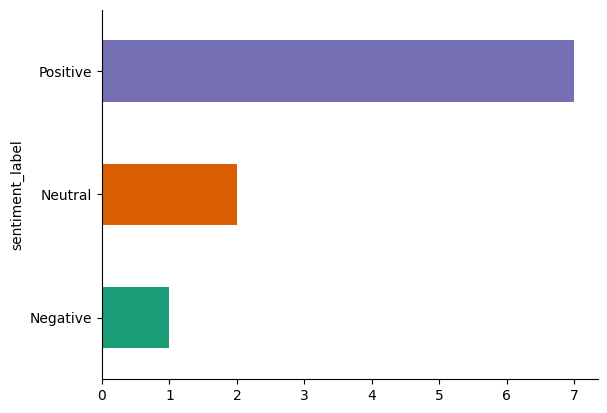

In [29]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('sentiment_label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [30]:
"""
Step 9 - Feature Prioritization Framework

This cell aggregates topic data, calculates the 'Problem Score',
and generates a prioritized list of features for improvement.
"""

print("\n--- Starting Feature Prioritization ---")

# Group by topic_id: count of reviews and average sentiment per topic
topic_metrics = df.groupby('topic_id').agg(
    review_count=('topic_id', 'count'),
    average_sentiment=('sentiment_compound', 'mean')
).reset_index()

# Exclude noise topic (-1)
prioritized_features = topic_metrics[topic_metrics['topic_id'] != -1].copy()

# Map topic names
prioritized_features['topic_name'] = prioritized_features['topic_id'].map(topic_name_mapping).fillna('Uninterpreted Topic')

# Calculate Problem Score = Frequency × (1 - Avg Sentiment)
prioritized_features['problem_score'] = prioritized_features['review_count'] * (1 - prioritized_features['average_sentiment'])

# Sort by Problem Score (highest to lowest)
prioritized_features = prioritized_features.sort_values(by='problem_score', ascending=False)

# Preview Top 10
print("\n--- Prioritized Features (Top 10 Topics Needing Attention) ---")
print(prioritized_features[['topic_id', 'topic_name', 'review_count', 'average_sentiment', 'problem_score']].head(10))

# Save to CSV
prioritized_features.to_csv('booking_com_prioritized_features_final.csv', index=False)
print("\nPrioritized features saved to 'booking_com_prioritized_features_final.csv'.")

# Download the file
from google.colab import files
files.download('booking_com_prioritized_features_final.csv')


--- Starting Feature Prioritization ---

--- Prioritized Features (Top 10 Topics Needing Attention) ---
    topic_id                                  topic_name  review_count  \
1          0                      Booking & Reservations         48559   
2          1                          General App Praise         33524   
3          2                                 Ease of Use         25600   
4          3              Positive Experience & Feedback         11360   
5          4                   Deals, Prices & Discounts          7119   
7          6          Misspelled Praise / Slang Variants          3338   
6          5                    Customer Service & Staff          4331   
8          7  Non-English Feedback (Spanish, Malay etc.)          2486   
10         9   Geo-Specific Reviews (Middle East & Asia)          1623   
13        12                     Technical Issues / Bugs          1002   

    average_sentiment  problem_score  
1            0.444772     26961.3336  
2 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


--- Generating Overall Sentiment Distribution Plot ---


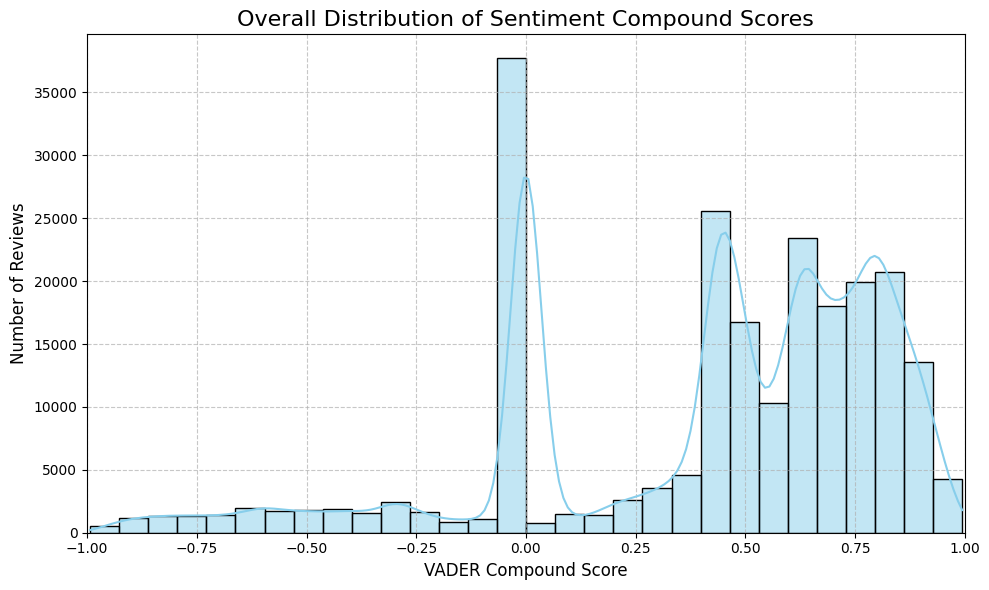

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [33]:
"""
Step 10 - Visualize Overall Sentiment Distribution

This cell generates a histogram/density plot of all VADER compound scores.
"""

print("\n--- Generating Overall Sentiment Distribution Plot ---")

plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment_compound'], bins=30, kde=True, color='skyblue')
plt.title('Overall Distribution of Sentiment Compound Scores', fontsize=16)
plt.xlabel('VADER Compound Score', fontsize=12)
plt.ylabel('Number of Reviews', fontsize=12)
plt.xlim(-1, 1) # VADER scores range from -1 to 1
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('overall_sentiment_distribution.png', dpi=300)
plt.show()


# Download the saved PNG file
from google.colab import files
files.download('overall_sentiment_distribution.png')



--- Generating Top Prioritized Topics Bar Chart ---


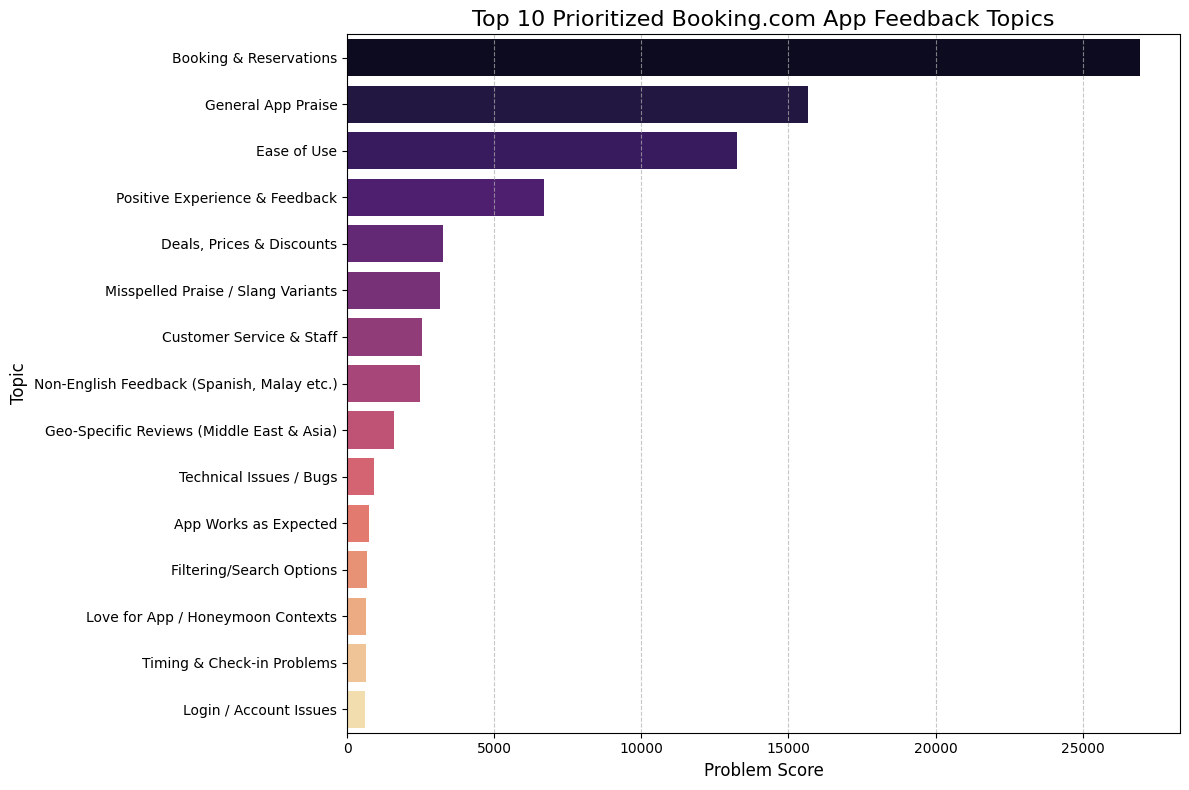

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [35]:
"""
Step 11 - Visualize Top Prioritized Topics Bar Chart

This cell generates a bar chart showing the top N prioritized topics based on their Problem Score.
"""

print("\n--- Generating Top Prioritized Topics Bar Chart ---")


top_n_for_chart = prioritized_features.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(x='problem_score', y='topic_name', data=top_n_for_chart, palette='magma')
plt.title('Top 10 Prioritized Booking.com App Feedback Topics', fontsize=16)
plt.xlabel('Problem Score', fontsize=12)
plt.ylabel('Topic', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('top_prioritized_topics_bar_chart.png', dpi=300)
plt.show()


# Download the file
from google.colab import files
files.download('top_prioritized_topics_bar_chart.png')



--- Generating Volume vs. Sentiment Scatter Plot ---


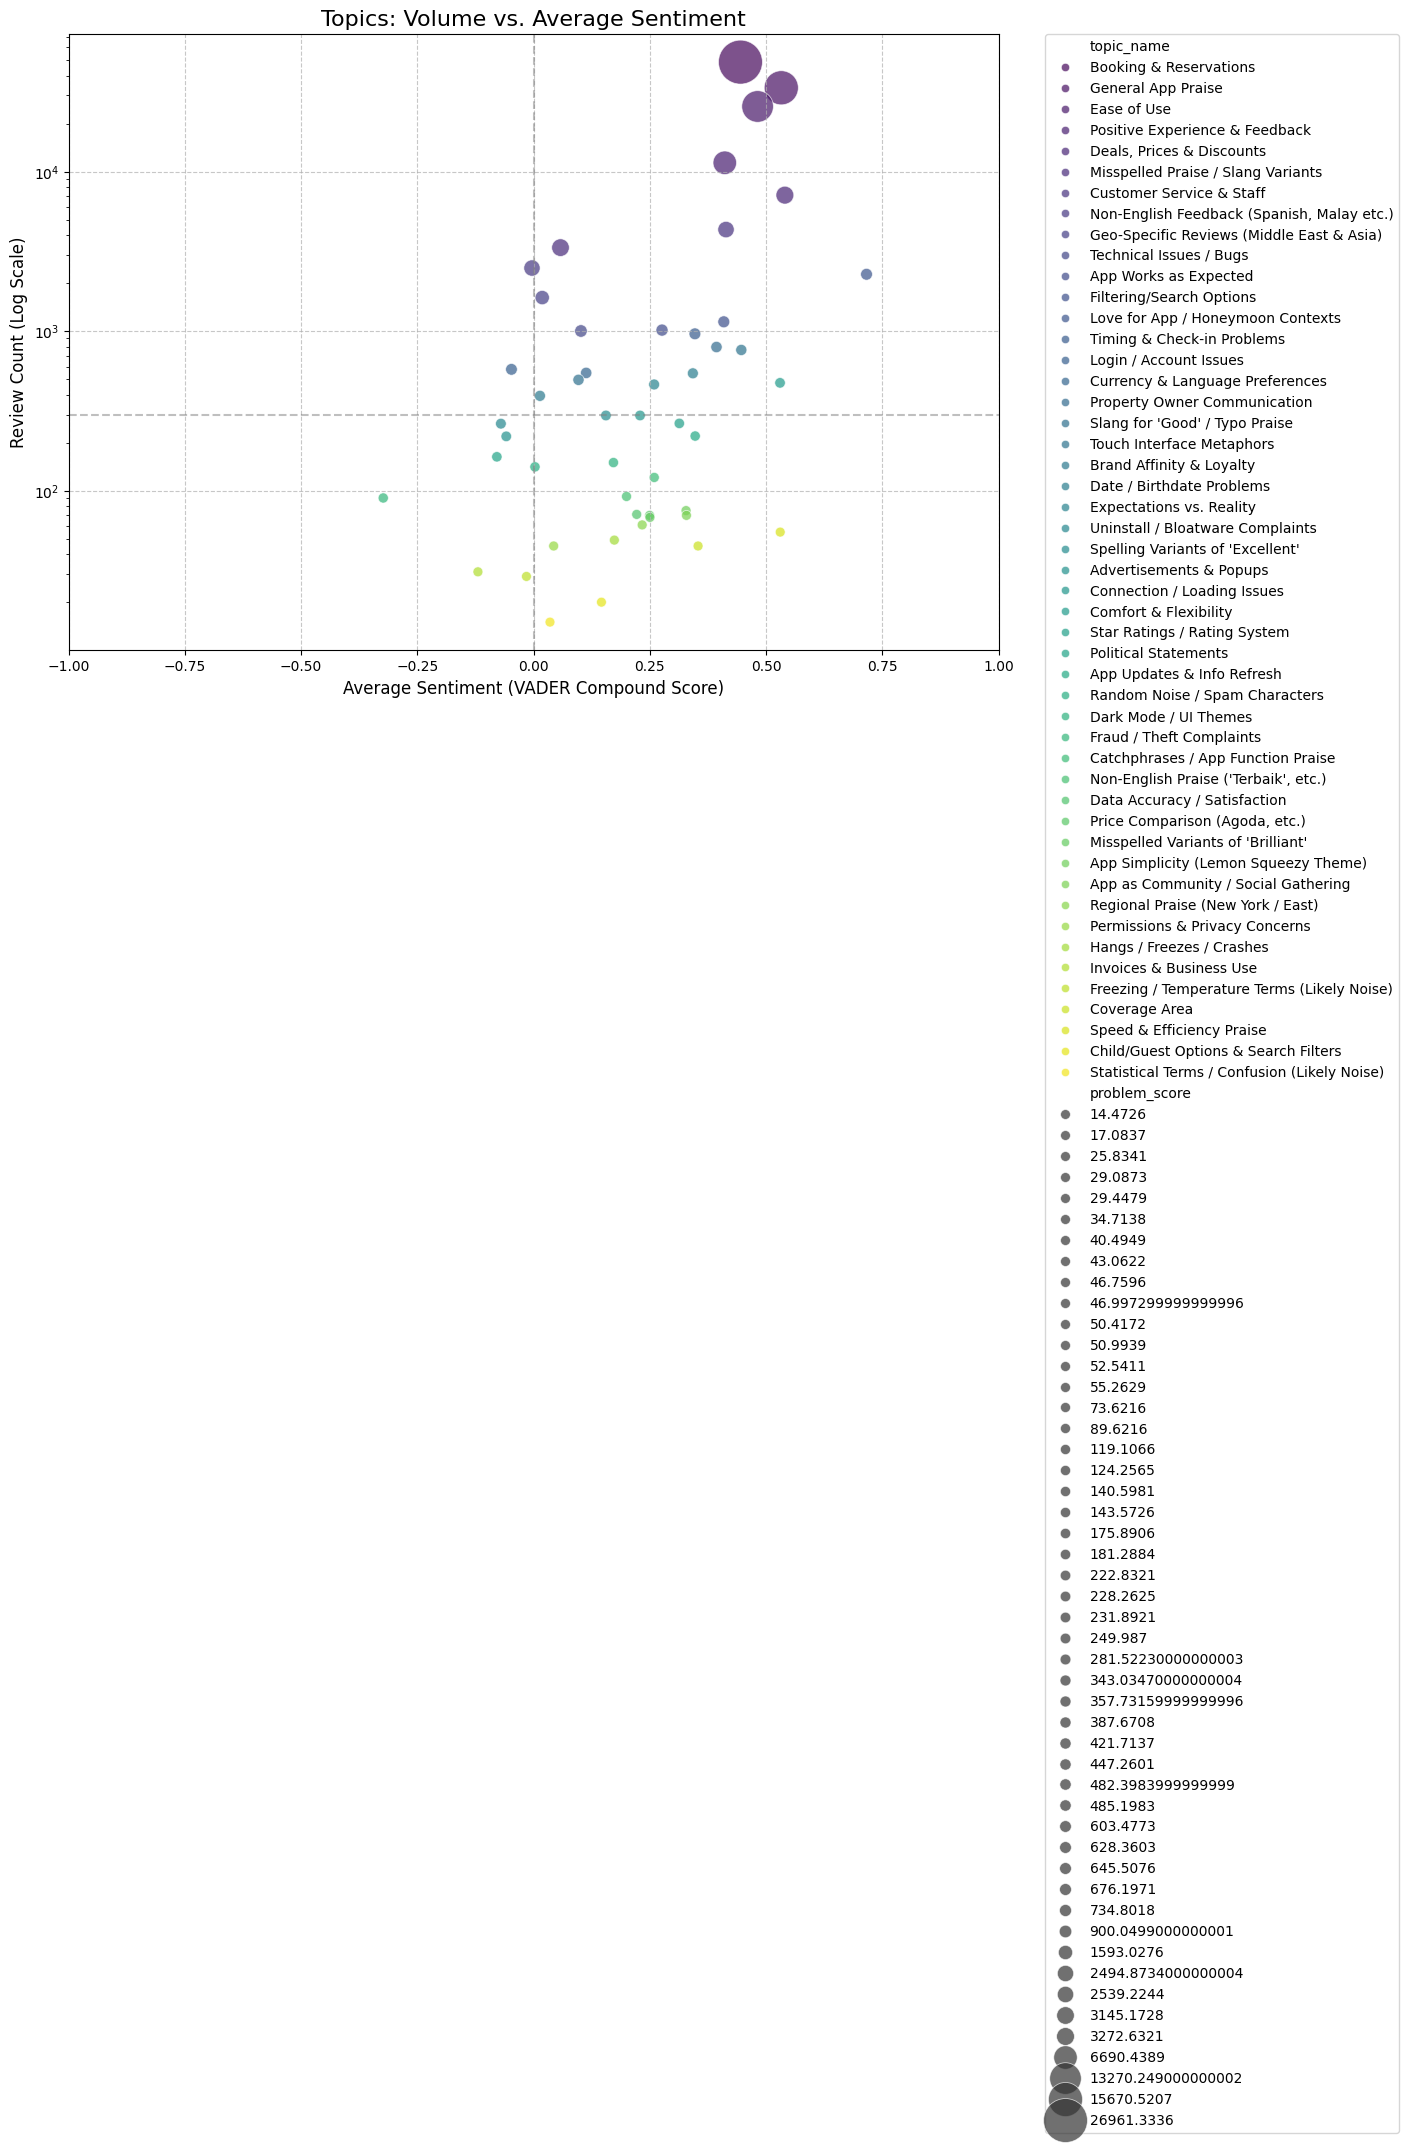

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


--- Core Visualizations Complete ---


In [36]:
"""
Step 12 - Visualize Volume vs. Sentiment Scatter Plot

This cell generates a scatter plot to visualize all topics by their review count (volume)
and average sentiment, aiding in quadrant analysis.
"""

print("\n--- Generating Volume vs. Sentiment Scatter Plot ---")

plt.figure(figsize=(12, 8))
# Use log scale for review_count for better visualization of spread
sns.scatterplot(
    x='average_sentiment',
    y='review_count',
    hue='topic_name', # Color points by topic name
    size='problem_score', # Size points by problem score
    sizes=(50, 1000), # Range of sizes for points
    data=prioritized_features,
    palette='viridis',
    legend='full',
    alpha=0.7
)
plt.xscale('linear') # Keep sentiment linear
plt.yscale('log') # Use log scale for review count
plt.title('Topics: Volume vs. Average Sentiment', fontsize=16)
plt.xlabel('Average Sentiment (VADER Compound Score)', fontsize=12)
plt.ylabel('Review Count (Log Scale)', fontsize=12)
plt.xlim(-1, 1) # VADER scores range from -1 to 1
plt.grid(True, linestyle='--', alpha=0.7)

# Add quadrants for interpretation (optional, but good for discussion)
plt.axvline(x=0, color='gray', linestyle='--', alpha=0.5) # Vertical line at neutral sentiment
plt.axhline(y=prioritized_features['review_count'].median(), color='gray', linestyle='--', alpha=0.5) # Horizontal line at median volume

# Adjust legend placement to avoid overlapping with plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.tight_layout(rect=[0, 0, 0.85, 1]) # Adjust layout to make space for legend
plt.savefig('volume_vs_sentiment_scatterplot.png', dpi=300)
plt.show()

# Download saved file
from google.colab import files
files.download('volume_vs_sentiment_scatterplot.png')

print("\n--- Core Visualizations Complete ---")


--- Generating Sentiment Score Summary Box Plot ---


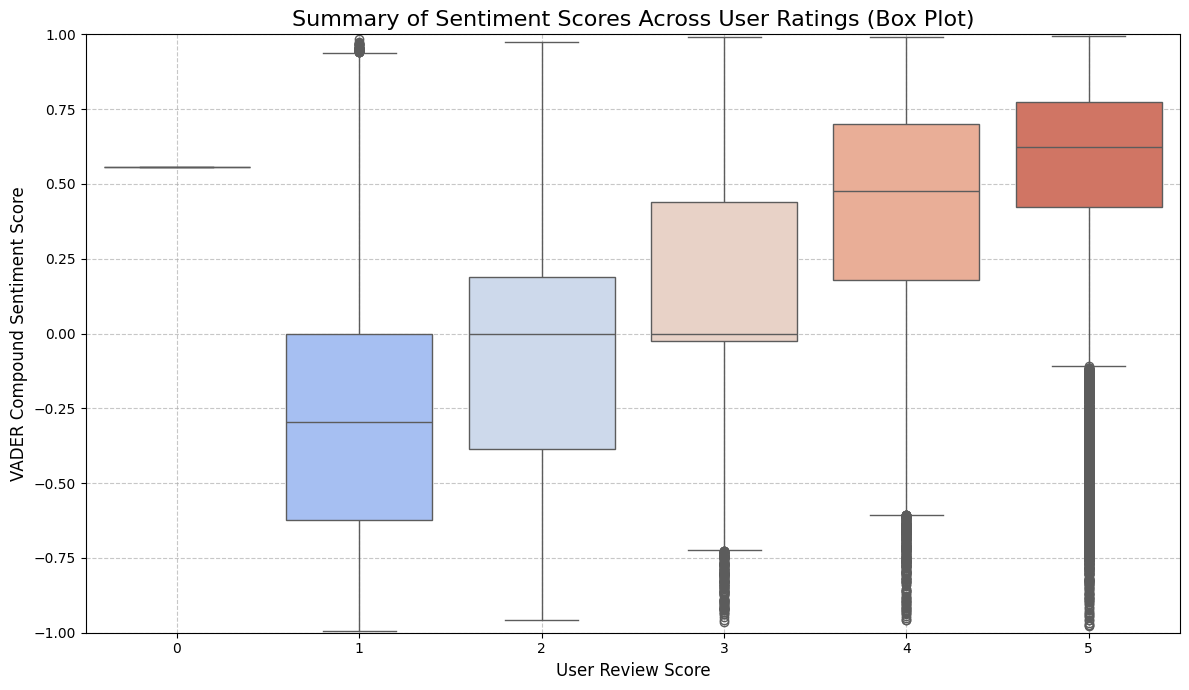

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [40]:
"""
Step 13 - Visualize Summary of Sentiment Scores by Review Group

This cell generates box plots to summarize the distribution of
VADER sentiment scores across different user review scores.
It focuses on central trends, outliers, and variability in feedback tone.
"""

print("\n--- Generating Sentiment Score Summary Box Plot ---")

plt.figure(figsize=(12, 7))
sns.boxplot(x='score', y='sentiment_compound', data=df, palette='coolwarm')
plt.title('Summary of Sentiment Scores Across User Ratings (Box Plot)', fontsize=16)
plt.xlabel('User Review Score', fontsize=12)
plt.ylabel('VADER Compound Sentiment Score', fontsize=12)
plt.ylim(-1, 1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('sentiment_score_summary_box.png', dpi=300)
plt.show()

# Download
from google.colab import files
files.download('sentiment_score_summary_box.png')



--- Generating Top Keywords for Key Topics Plots ---


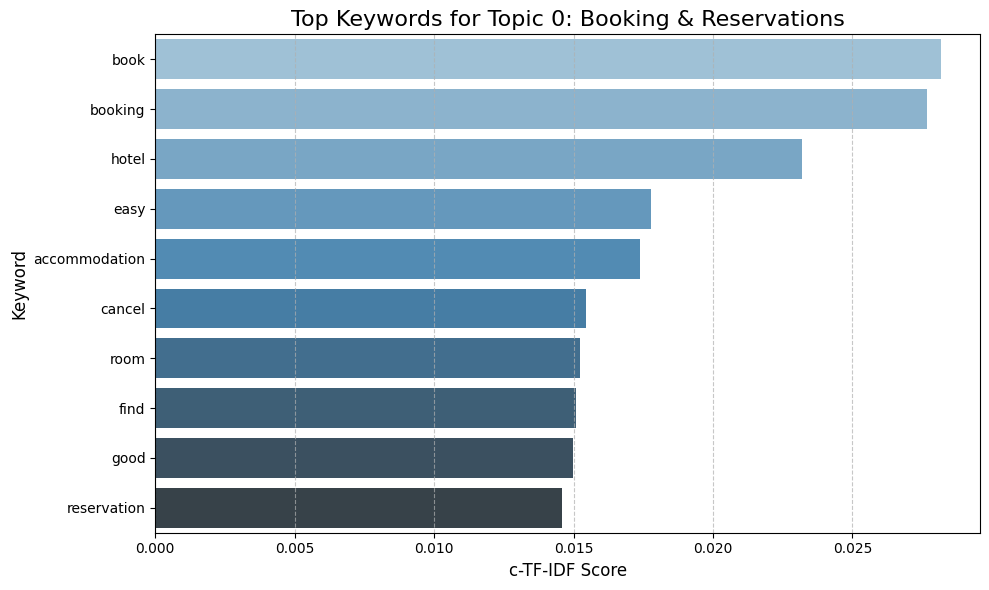


 Keywords plot for Topic 0 saved as topic_0


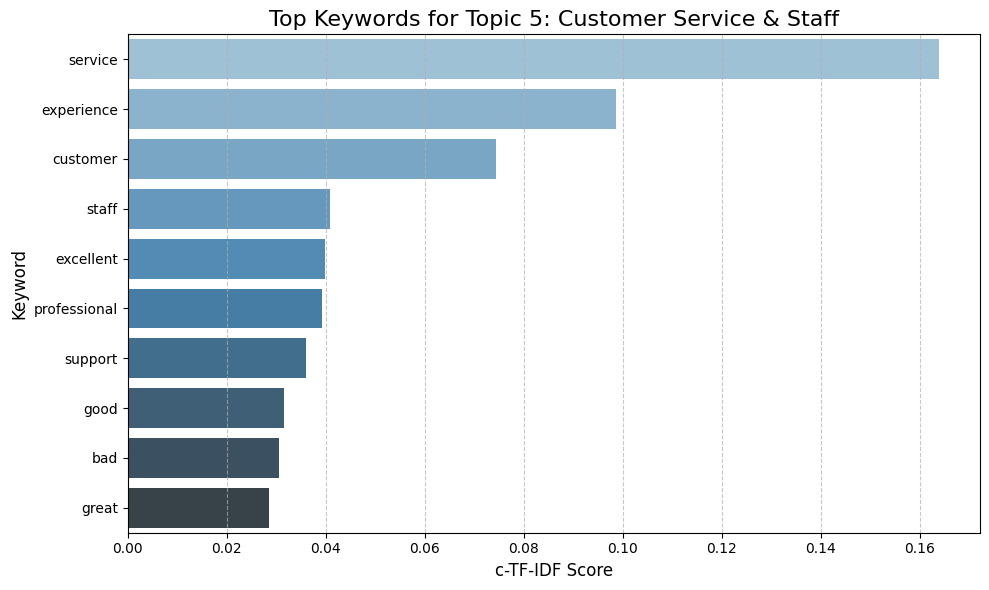


 Keywords plot for Topic 5 saved as topic_5


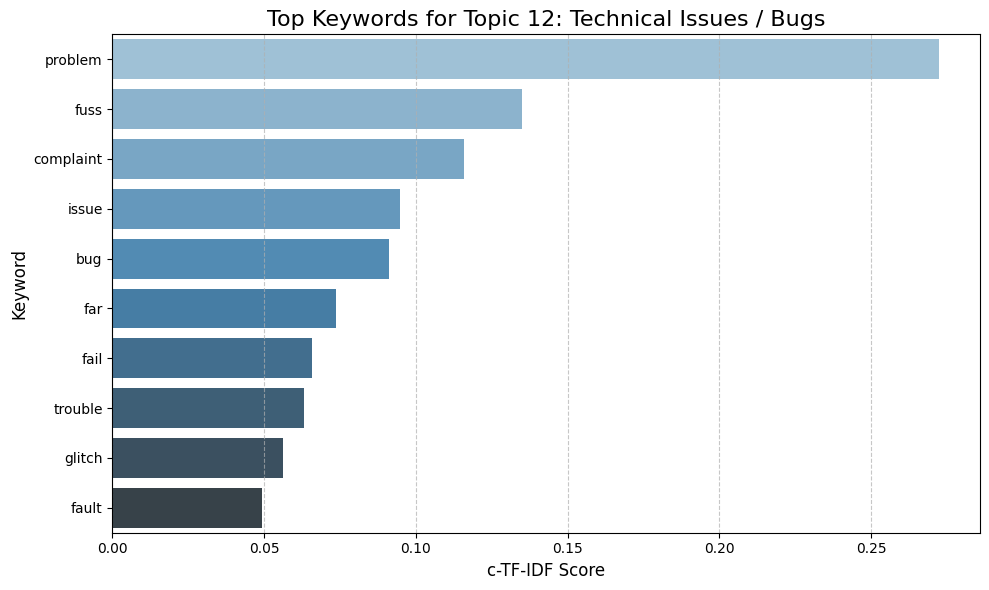


 Keywords plot for Topic 12 saved as topic_12


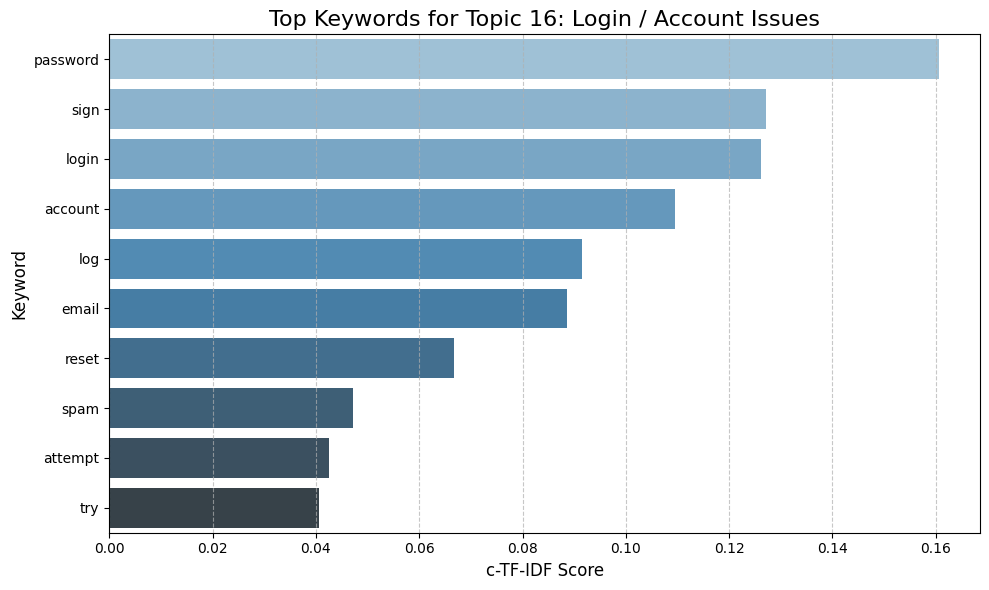


 Keywords plot for Topic 16 saved as topic_16


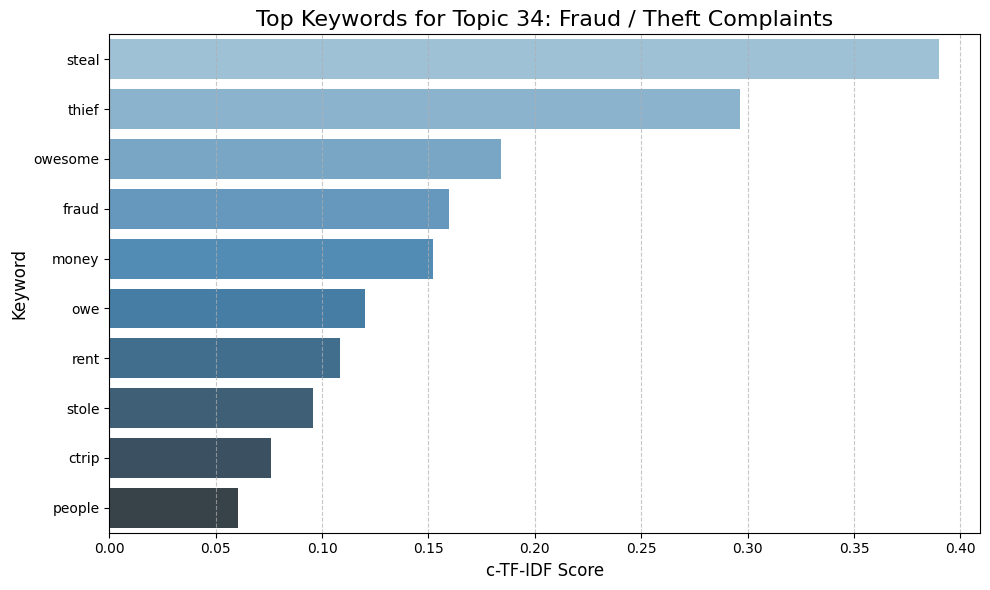


 Keywords plot for Topic 34 saved as topic_34


In [44]:
"""
Step 14 - Visualize Top Keywords for Key Topics (Specific Topics)

This cell generates horizontal bar charts for the top keywords of our
most important topics.
"""

print("\n--- Generating Top Keywords for Key Topics Plots ---")

# --- USER-SPECIFIED TOPIC IDs ---
topics_to_visualize_keywords = [0, 5, 12, 16, 34] # Booking, Customer Service, Technical Issues, Login, Fraud

for topic_id in topics_to_visualize_keywords:
    # This returns a list of (keyword, c-TF-IDF score) tuples
    topic_info = model.get_topic(topic_id)

    if not topic_info:
        print(f"No keyword information found for Topic ID: {topic_id}. Skipping.")
        continue

    # Convert to DataFrame for easier plotting
    keywords_data = pd.DataFrame(topic_info, columns=['keyword', 'score'])
    top_n_keywords = keywords_data.head(min(10, len(keywords_data)))

    # Get the human-readable topic name from your mapping
    topic_name = topic_name_mapping.get(topic_id, f"Topic {topic_id} (Uninterpreted)")

    plt.figure(figsize=(10, 6))
    # Sort keywords by score in descending order for the bar plot
    sns.barplot(x='score', y='keyword', data=top_n_keywords.sort_values(by='score', ascending=False), palette='Blues_d')

    plt.title(f'Top Keywords for Topic {topic_id}: {topic_name}', fontsize=16)
    plt.xlabel('c-TF-IDF Score', fontsize=12)
    plt.ylabel('Keyword', fontsize=12)
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Save the plot with a descriptive filename
    plt.savefig(f'topic_{topic_id}_keywords_bar_chart.png', dpi=300)
    plt.show()
    print(f"\n Keywords plot for Topic {topic_id} saved as topic_{topic_id}")



--- Generating Emotional Tone Distribution Violin Plot ---


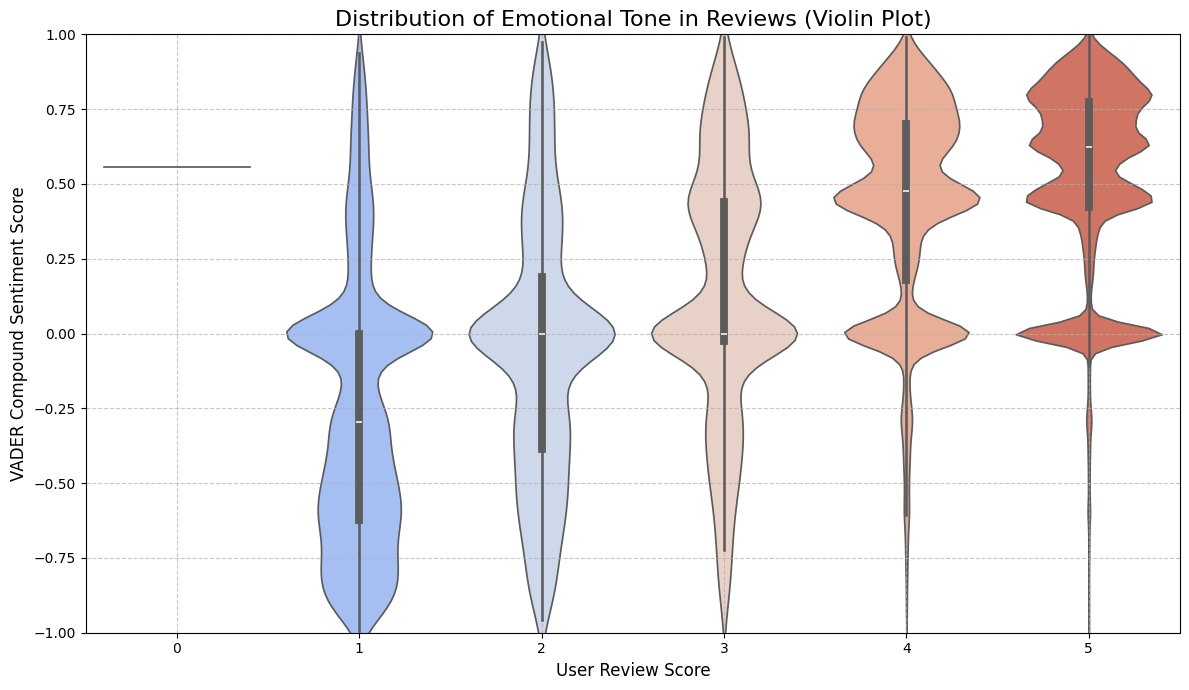

Violin plot saved as emotional_tone_distribution_violin.png


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Top keywords visualization complete for specified topics.


In [45]:
"""
Step 15 - Visualize Emotional Tone Distribution Across User Feedback

This cell generates violin plots that illustrate the distribution of
VADER sentiment scores across different user ratings.
It highlights the density and variation in emotional tone found in reviews.
"""

print("\n--- Generating Emotional Tone Distribution Violin Plot ---")

plt.figure(figsize=(12, 7))
sns.violinplot(x='score', y='sentiment_compound', data=df, palette='coolwarm')
plt.title('Distribution of Emotional Tone in Reviews (Violin Plot)', fontsize=16)
plt.xlabel('User Review Score', fontsize=12)
plt.ylabel('VADER Compound Sentiment Score', fontsize=12)
plt.ylim(-1, 1)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('emotional_tone_distribution_violin.png', dpi=300)
plt.show()
print("Violin plot saved as emotional_tone_distribution_violin.png")

# Download
from google.colab import files
files.download('emotional_tone_distribution_violin.png')

print("Top keywords visualization complete for specified topics.")
